# Manova

In [127]:
# Import libraries
import pandas as pd
%matplotlib inline
import seaborn as sns
import numpy as np
import pingouin as pg
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency, ttest_ind, f_oneway, shapiro, chi2, kruskal
import statsmodels.api as sm
from scipy.stats.stats import pearsonr
from statsmodels.multivariate.manova import MANOVA
import researchpy as rp

### Data prep

In [128]:
# import the data
kg = pd.read_csv("05-12-2021_kontrollgruppe_df.csv", index_col=0) 
ug = pd.read_csv("05-12-2021_untersuchungsgruppe_df.csv", index_col=0)

In [129]:
# use shortcuts
# U = Uncertainty
# R = Conditional risk perception
# I = Information comprehension
# H = Behavioral intention
# C = Perceived efficacy
eg_short = ug[["unsicherheit_score", "risikowahrnehmung_score", "informationsverstaendnissubjektiv_score", "handlungsbereitschaft_score", "coping_score"]]
eg_short.columns = ["U", "R", "I", "H", "C"]
eg_short["Gruppe"] = "UG"
eg_short

C:\Users\diego\AppData\Local\Temp/ipykernel_2672/1859721514.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eg_short["Gruppe"] = "UG"


,U,R,I,H,C,Gruppe
0,2.50,1.666667,2.5,2.8,2.666667,UG
1,2.00,2.000000,3.7,3.4,1.000000,UG
2,0.00,0.000000,4.6,0.0,0.000000,UG
3,3.25,1.666667,4.2,3.0,2.500000,UG
4,3.00,0.000000,3.4,2.4,2.000000,UG
...,...,...,...,...,...,...
188,2.25,1.000000,4.9,3.4,2.888889,UG
189,1.75,2.000000,4.5,2.2,2.388889,UG
190,0.00,0.000000,0.3,2.6,0.500000,UG
191,2.00,1.000000,3.0,2.2,2.388889,UG


In [130]:
cg_short = kg[["unsicherheit_score", "risikowahrnehmung_score", "informationsverstaendnissubjektiv_score", "handlungsbereitschaft_score", "coping_score"]]
cg_short.columns = ["U", "R", "I", "H", "C"]
cg_short["Gruppe"] = "KG"
cg_short

C:\Users\diego\AppData\Local\Temp/ipykernel_2672/3085899857.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cg_short["Gruppe"] = "KG"


,U,R,I,H,C,Gruppe
0,0.25,2.000000,3.3,2.4,2.055556,KG
1,1.50,1.666667,4.6,4.0,3.722222,KG
2,2.50,1.333333,4.2,3.0,2.111111,KG
3,3.75,1.000000,4.4,1.4,1.888889,KG
4,2.75,2.333333,3.9,2.0,2.611111,KG
...,...,...,...,...,...,...
95,2.75,1.333333,4.7,4.0,3.055556,KG
96,1.00,1.666667,4.2,3.4,3.111111,KG
97,2.75,1.666667,4.4,3.8,2.388889,KG
98,2.25,1.666667,4.6,2.2,2.666667,KG


In [131]:
all_short = eg_short.append(cg_short)
all_short

,U,R,I,H,C,Gruppe
0,2.50,1.666667,2.5,2.8,2.666667,UG
1,2.00,2.000000,3.7,3.4,1.000000,UG
2,0.00,0.000000,4.6,0.0,0.000000,UG
3,3.25,1.666667,4.2,3.0,2.500000,UG
4,3.00,0.000000,3.4,2.4,2.000000,UG
...,...,...,...,...,...,...
95,2.75,1.333333,4.7,4.0,3.055556,KG
96,1.00,1.666667,4.2,3.4,3.111111,KG
97,2.75,1.666667,4.4,3.8,2.388889,KG
98,2.25,1.666667,4.6,2.2,2.666667,KG


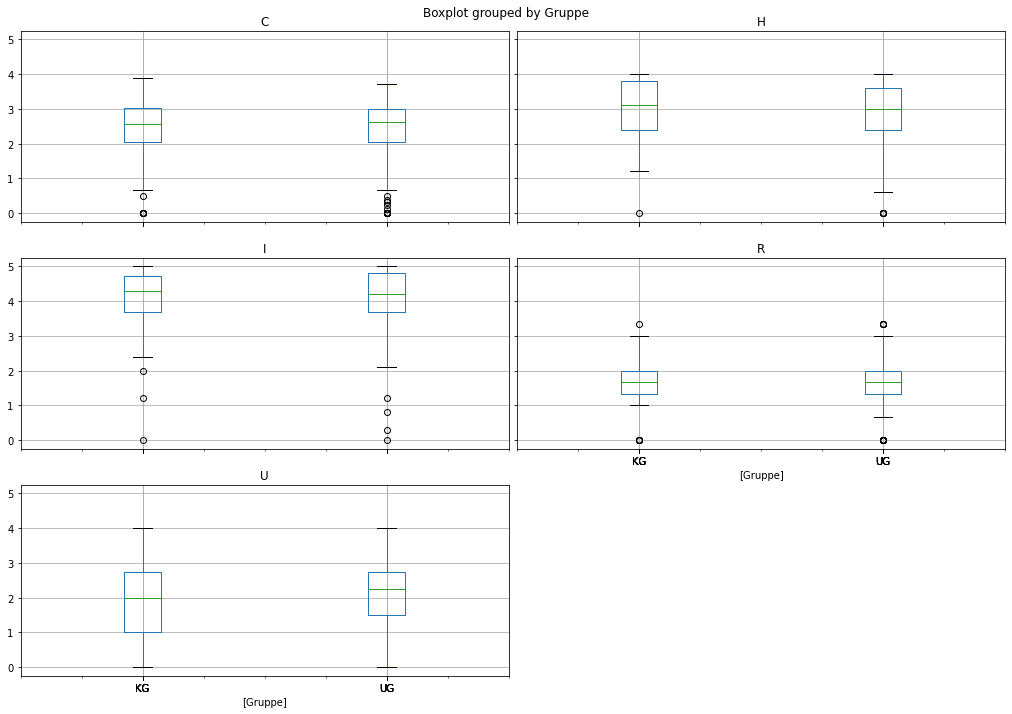

In [132]:
all_short.boxplot(by='Gruppe', figsize=(14,10))
plt.tight_layout(pad=0.5)
plt.savefig('Grafiken_Daten/Boxplot_scores_by_gruppe_abschlusspresentation', dpi = 600)
#plt.show()

## Requirement 1: Inspect distributions

### Conditional risk perception score

In [133]:
len(ug.risikowahrnehmung_score.unique()), len(kg.risikowahrnehmung_score.unique())

(10, 9)

In [134]:
ug.risikowahrnehmung_score.describe(), kg.risikowahrnehmung_score.describe()

(count    193.000000
 mean       1.671848
 std        0.660104
 min        0.000000
 25%        1.333333
 50%        1.666667
 75%        2.000000
 max        3.333333
 Name: risikowahrnehmung_score, dtype: float64,
 count    100.000000
 mean       1.676667
 std        0.616742
 min        0.000000
 25%        1.333333
 50%        1.666667
 75%        2.000000
 max        3.333333
 Name: risikowahrnehmung_score, dtype: float64)

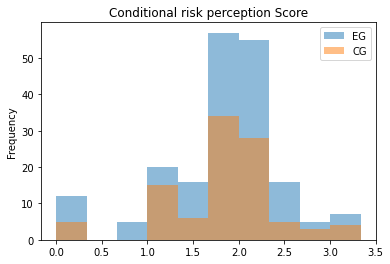

In [135]:
df =  pd.DataFrame()
df['EG'] = ug.risikowahrnehmung_score
df['CG'] = kg.risikowahrnehmung_score
ax = df.plot.hist(alpha=0.5)
plt.title("Conditional risk perception Score")
plt.savefig('Grafiken_Daten/Risikowahrnehmung_Score', dpi = 600)
plt.show()

In [136]:
# normality test for eg
stat, p = shapiro(ug.risikowahrnehmung_score)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Since the p-value is bigger than the defined alpha level, the null hypotesis (normal distribution) is accepted')
else:
	print('Since the p-value is lower than the defined alpha level, the null hypotesis (normal distribution) is rejected')

Statistics=0.910, p=0.000
Since the p-value is lower than the defined alpha level, the null hypotesis (normal distribution) is rejected


In [137]:
# normality test for cg
stat, p = shapiro(kg.risikowahrnehmung_score)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Since the p-value is bigger than the defined alpha level, the null hypotesis (normal distribution) is accepted')
else:
	print('Since the p-value is lower than the defined alpha level, the null hypotesis (normal distribution) is rejected')

Statistics=0.902, p=0.000
Since the p-value is lower than the defined alpha level, the null hypotesis (normal distribution) is rejected


### Information comprehension score

In [138]:
len(ug.informationsverstaendnissubjektiv_score.unique()), len(kg.informationsverstaendnissubjektiv_score.unique())

(30, 27)

In [139]:
ug.informationsverstaendnissubjektiv_score.describe(), kg.informationsverstaendnissubjektiv_score.describe()

(count    193.000000
 mean       4.071503
 std        0.868767
 min        0.000000
 25%        3.700000
 50%        4.200000
 75%        4.800000
 max        5.000000
 Name: informationsverstaendnissubjektiv_score, dtype: float64,
 count    100.000000
 mean       4.104000
 std        0.871655
 min        0.000000
 25%        3.700000
 50%        4.300000
 75%        4.725000
 max        5.000000
 Name: informationsverstaendnissubjektiv_score, dtype: float64)

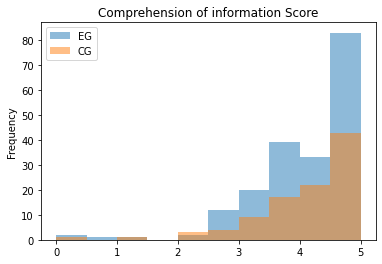

In [140]:
df =  pd.DataFrame()
df['EG'] = ug.informationsverstaendnissubjektiv_score
df['CG'] = kg.informationsverstaendnissubjektiv_score
ax = df.plot.hist(alpha=0.5)
plt.title("Comprehension of information Score")
plt.savefig('Grafiken_Daten/informationsverständnis_score', dpi = 600)
plt.show()

In [141]:
# normality test for ug
stat, p = shapiro(ug.informationsverstaendnissubjektiv_score)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Since the p-value is bigger than the defined alpha level, the null hypotesis (normal distribution) is accepted')
else:
	print('Since the p-value is lower than the defined alpha level, the null hypotesis (normal distribution) is rejected')

Statistics=0.860, p=0.000
Since the p-value is lower than the defined alpha level, the null hypotesis (normal distribution) is rejected


In [142]:
# normality test for kg
stat, p = shapiro(kg.informationsverstaendnissubjektiv_score)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Since the p-value is bigger than the defined alpha level, the null hypotesis (normal distribution) is accepted')
else:
	print('Since the p-value is lower than the defined alpha level, the null hypotesis (normal distribution) is rejected')

Statistics=0.849, p=0.000
Since the p-value is lower than the defined alpha level, the null hypotesis (normal distribution) is rejected


### Behavioral intention score

In [143]:
len(ug.handlungsbereitschaft_score.unique()), len(kg.handlungsbereitschaft_score.unique())

(17, 16)

In [144]:
ug.handlungsbereitschaft_score.describe(), kg.handlungsbereitschaft_score.describe()

(count    193.000000
 mean       2.947150
 std        0.902949
 min        0.000000
 25%        2.400000
 50%        3.000000
 75%        3.600000
 max        4.000000
 Name: handlungsbereitschaft_score, dtype: float64,
 count    100.000000
 mean       3.038000
 std        0.825696
 min        0.000000
 25%        2.400000
 50%        3.100000
 75%        3.800000
 max        4.000000
 Name: handlungsbereitschaft_score, dtype: float64)

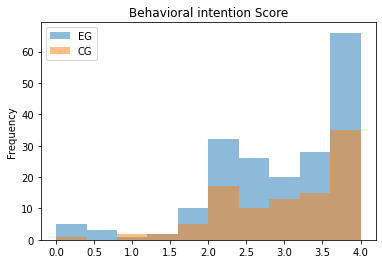

In [145]:
df =  pd.DataFrame()
df['EG'] = ug.handlungsbereitschaft_score
df['CG'] = kg.handlungsbereitschaft_score
ax = df.plot.hist(alpha=0.5)
plt.title("Behavioral intention Score")
plt.savefig('Grafiken_Daten/handlungsbereitschaft_score', dpi = 600)
plt.show()

In [146]:
# normality test for ug
stat, p = shapiro(kg.handlungsbereitschaft_score)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Since the p-value is bigger than the defined alpha level, the null hypotesis (normal distribution) is accepted')
else:
	print('Since the p-value is lower than the defined alpha level, the null hypotesis (normal distribution) is rejected')

Statistics=0.916, p=0.000
Since the p-value is lower than the defined alpha level, the null hypotesis (normal distribution) is rejected


In [147]:
# normality test for ug
stat, p = shapiro(ug.handlungsbereitschaft_score)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Since the p-value is bigger than the defined alpha level, the null hypotesis (normal distribution) is accepted')
else:
	print('Since the p-value is lower than the defined alpha level, the null hypotesis (normal distribution) is rejected')

Statistics=0.895, p=0.000
Since the p-value is lower than the defined alpha level, the null hypotesis (normal distribution) is rejected


### Perceived efficacy score

In [148]:
len(ug.coping_score.unique()), len(kg.coping_score.unique())

(55, 45)

In [149]:
ug.coping_score.describe(), kg.coping_score.describe()

(count    193.000000
 mean       2.407311
 std        0.937944
 min        0.000000
 25%        2.055556
 50%        2.611111
 75%        3.000000
 max        3.722222
 Name: coping_score, dtype: float64,
 count    100.000000
 mean       2.400000
 std        0.933404
 min        0.000000
 25%        2.055556
 50%        2.555556
 75%        3.013889
 max        3.888889
 Name: coping_score, dtype: float64)

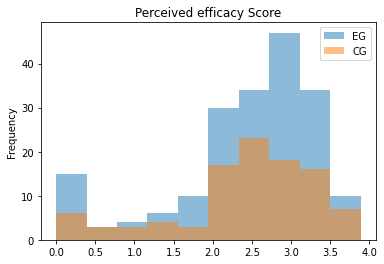

In [150]:
df =  pd.DataFrame()
df['EG'] = ug.coping_score
df['CG'] = kg.coping_score
ax = df.plot.hist(alpha=0.5)
plt.title("Perceived efficacy Score")
plt.savefig('Grafiken_Daten/coping_score', dpi = 600)
plt.show()

In [151]:
# normality test for ug
stat, p = shapiro(kg.coping_score)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Since the p-value is bigger than the defined alpha level, the null hypotesis (normal distribution) is accepted')
else:
	print('Since the p-value is lower than the defined alpha level, the null hypotesis (normal distribution) is rejected')

Statistics=0.901, p=0.000
Since the p-value is lower than the defined alpha level, the null hypotesis (normal distribution) is rejected


In [152]:
# normality test for ug
stat, p = shapiro(ug.coping_score)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Since the p-value is bigger than the defined alpha level, the null hypotesis (normal distribution) is accepted')
else:
	print('Since the p-value is lower than the defined alpha level, the null hypotesis (normal distribution) is rejected')

Statistics=0.865, p=0.000
Since the p-value is lower than the defined alpha level, the null hypotesis (normal distribution) is rejected


### Uncertainty score

In [153]:
len(ug.unsicherheit_score.unique()), len(kg.unsicherheit_score.unique())

(16, 16)

In [154]:
ug.unsicherheit_score.describe(), kg.unsicherheit_score.describe()

(count    193.000000
 mean       2.051813
 std        0.994403
 min        0.000000
 25%        1.500000
 50%        2.250000
 75%        2.750000
 max        4.000000
 Name: unsicherheit_score, dtype: float64,
 count    100.000000
 mean       2.005000
 std        1.076599
 min        0.000000
 25%        1.000000
 50%        2.000000
 75%        2.750000
 max        4.000000
 Name: unsicherheit_score, dtype: float64)

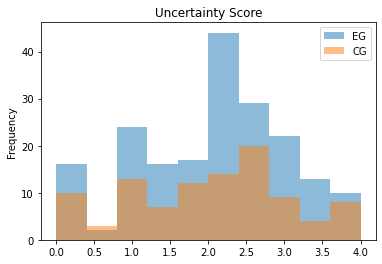

In [155]:
df =  pd.DataFrame()
df['EG'] = ug.unsicherheit_score
df['CG'] = kg.unsicherheit_score
ax = df.plot.hist(alpha=0.5)
plt.title("Uncertainty Score")
plt.savefig('Grafiken_Daten/unsicherheit_score', dpi = 600)
plt.show()

In [156]:
# normality test for ug
stat, p = shapiro(kg.unsicherheit_score)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Since the p-value is bigger than the defined alpha level, the null hypotesis (normal distribution) is accepted')
else:
	print('Since the p-value is lower than the defined alpha level, the null hypotesis (normal distribution) is rejected')

Statistics=0.965, p=0.009
Since the p-value is lower than the defined alpha level, the null hypotesis (normal distribution) is rejected


In [157]:
# normality test for ug
stat, p = shapiro(ug.unsicherheit_score)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Since the p-value is bigger than the defined alpha level, the null hypotesis (normal distribution) is accepted')
else:
	print('Since the p-value is lower than the defined alpha level, the null hypotesis (normal distribution) is rejected')

Statistics=0.966, p=0.000
Since the p-value is lower than the defined alpha level, the null hypotesis (normal distribution) is rejected


## Requirement 2: Correlations among the dependent variables

In [158]:
ug[["unsicherheit_score", "risikowahrnehmung_score", "informationsverstaendnissubjektiv_score", "handlungsbereitschaft_score", "coping_score"]].corr()

,unsicherheit_score,risikowahrnehmung_score,informationsverstaendnissubjektiv_score,handlungsbereitschaft_score,coping_score
unsicherheit_score,1.000000,0.242916,0.134955,0.181434,0.233429
risikowahrnehmung_score,0.242916,1.000000,0.220347,0.354069,0.262804
informationsverstaendnissubjektiv_score,0.134955,0.220347,1.000000,0.308265,0.404534
handlungsbereitschaft_score,0.181434,0.354069,0.308265,1.000000,0.498057
coping_score,0.233429,0.262804,0.404534,0.498057,1.000000


## Requirement 2: Homogeneity of variance

In [159]:
len(all_short)

293

In [160]:
all_short[["R", "I", "H", "C", "U"]] = round(all_short[["R", "I", "H", "C", "U"]].astype("float64"), 1)
all_short

,U,R,I,H,C,Gruppe
0,2.5,1.7,2.5,2.8,2.7,UG
1,2.0,2.0,3.7,3.4,1.0,UG
2,0.0,0.0,4.6,0.0,0.0,UG
3,3.2,1.7,4.2,3.0,2.5,UG
4,3.0,0.0,3.4,2.4,2.0,UG
...,...,...,...,...,...,...
95,2.8,1.3,4.7,4.0,3.1,KG
96,1.0,1.7,4.2,3.4,3.1,KG
97,2.8,1.7,4.4,3.8,2.4,KG
98,2.2,1.7,4.6,2.2,2.7,KG


In [161]:
# Box M test for homogeneity of variance
pg.box_m(all_short, dvs=["R", "I", "H", "C", "U"], group='Gruppe')

,Chi2,df,pval,equal_cov
box,15.852822,15.0,0.3919,True


## Calculate MANOVA

In [162]:
# calculate manova
maov = MANOVA.from_formula('U + R + I + H + C  ~ Gruppe', data=all_short)

In [163]:
print(maov.mv_test())

                   Multivariate linear model
                                                               
---------------------------------------------------------------
       Intercept         Value  Num DF  Den DF  F Value  Pr > F
---------------------------------------------------------------
          Wilks' lambda  0.0866 5.0000 287.0000 605.5562 0.0000
         Pillai's trace  0.9134 5.0000 287.0000 605.5562 0.0000
 Hotelling-Lawley trace 10.5498 5.0000 287.0000 605.5562 0.0000
    Roy's greatest root 10.5498 5.0000 287.0000 605.5562 0.0000
---------------------------------------------------------------
                                                               
---------------------------------------------------------------
           Gruppe         Value  Num DF  Den DF  F Value Pr > F
---------------------------------------------------------------
            Wilks' lambda 0.9959 5.0000 287.0000  0.2386 0.9452
           Pillai's trace 0.0041 5.0000 287.0000  0.2386 0.

## Calculate ANOVA

In [171]:
# use shortcuts to investigate each single score
# U = Uncertainty
# R = Conditional risk perception
# I = Information comprehension
# H = Behavioral intention
# C = Perceived efficacy

In [214]:
# define the score to be investigated
x = "I"

In [215]:
stat, p = f_oneway(eg_short[x], cg_short[x])
# interpret
alpha = 0.1
if p > alpha:
	print('Since the p-value is bigger than the defined alpha level, the null hypothesis (that the median of the populations are equal) is accepted. P-value: ', p)
else:
	print('Since the p-value is lower than the defined alpha level, the null hypothesis (that the median of the populations are equal) will be rejected. P-value: ', p)

Since the p-value is bigger than the defined alpha level, the null hypothesis (that the median of the populations are equal) is accepted. P-value:  0.761917087312042


In [216]:
pg.anova(dv=x, between='Gruppe', data=all_short,
               detailed=True)

,Source,SS,DF,MS,F,p-unc,np2
0,Gruppe,0.069564,1,0.069564,0.09196,0.761917,0.000316
1,Within,220.131664,291,0.756466,NaN,NaN,NaN


In [217]:
rp.summary_cont(all_short[x].groupby(all_short['Gruppe']))


,N,Mean,SD,SE,95% Conf.,Interval
Gruppe,,,,,,
KG,100,4.1040,0.8717,0.0872,3.9310,4.2770
UG,193,4.0715,0.8688,0.0625,3.9482,4.1948


In [218]:
stat

0.09195972037075179

In [219]:
p

0.761917087312042